# To address our analysis, we need to respond to the subsequent inquiries:
1.Do a greater number of restaurants provide online delivery as opposed to offline services?
2.Which types of restaurants are the most favored by the general public?
3.What price range is preferred by couples for their dinner at restaurants?

In [155]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#read csv_dataset using pandas
dataframe=pd.read_csv("C:\\Users\\manoh\\Zomato data .csv")


In [144]:
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [145]:
#if you want to convert the data_type(rate):

def convert_data_type_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataframe['rate']=dataframe['rate'].apply(convert_data_type_rate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [146]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


Text(0.5, 1.0, 'listed_in type')

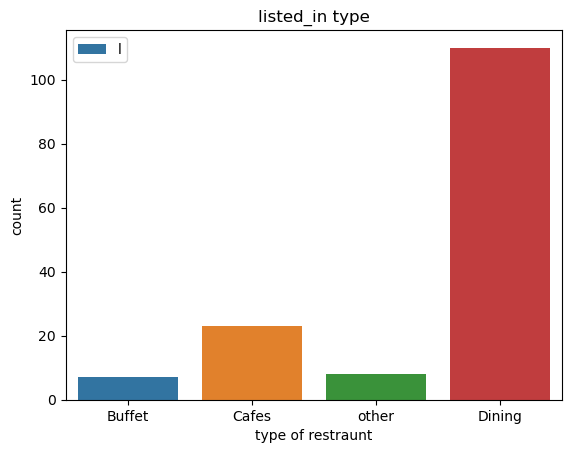

In [156]:
# i want majority of the restarunt fall in  which category

sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restraunt')
plt.legend('listed_in type')
plt.title('listed_in type')

Text(0, 0.5, 'votes')

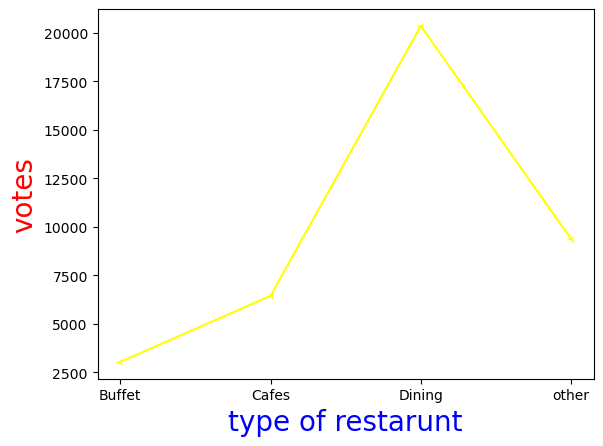

In [148]:
#2.Which types of restaurants are the most favored by the general public?

grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='yellow',marker="3")
plt.xlabel("type of restarunt",c="blue",size=20)
plt.ylabel("votes",c="red",size=20)

In [149]:
max_votes=df['votes'].max()
restaurant_with_max_votes=df.loc[df['votes']==max_votes,'name']
print("restarunt_with_maximum_votes:")
print(restaurant_with_max_votes)

restarunt_with_maximum_votes:
38    Empire Restaurant
Name: name, dtype: object


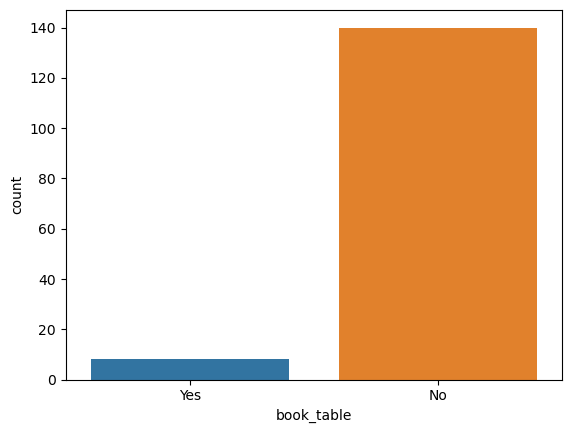

In [150]:
#check wheather the customers book table on not

sns.countplot(x=df["book_table"])
plt.color="red","yellow"
plt.show()

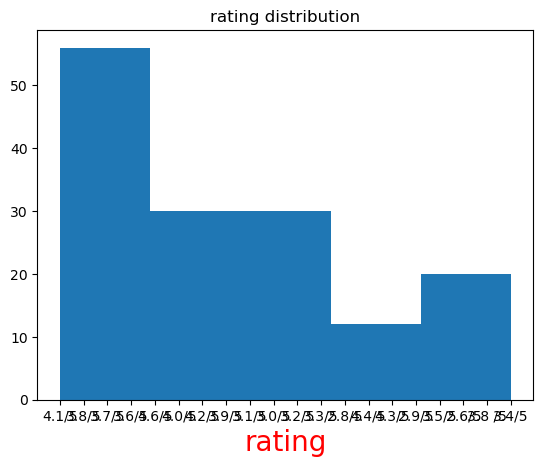

In [151]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.xlabel('rating',color='red',size=20)
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

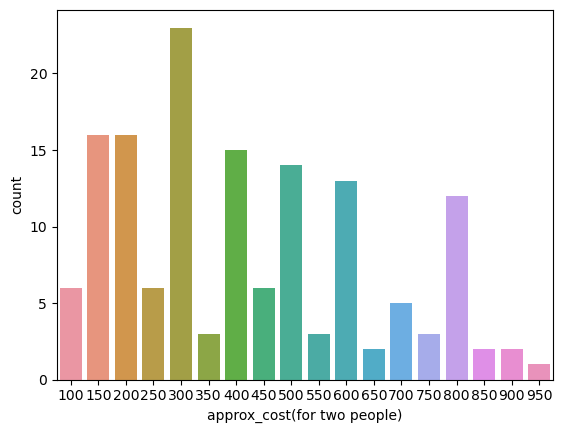

In [152]:
#3.What price range is preferred by couples for their dinner at restaurants?

two_people_cost=df['approx_cost(for two people)']
sns.countplot(x=two_people_cost)

<Axes: xlabel='online_order', ylabel='rate'>

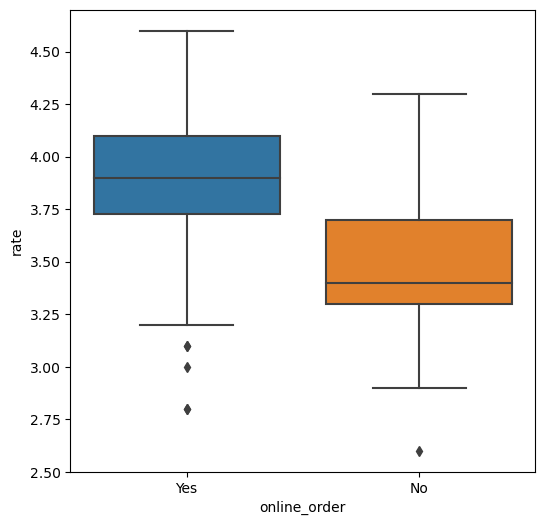

In [153]:
#1.Do a greater number of restaurants provide online delivery as opposed to offline services?

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe)

C:\Users\manoh\AppData\Local\Temp\ipykernel_32984\2380152792.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table=df.pivot_table(index='listed_in(type)',columns="online_order")


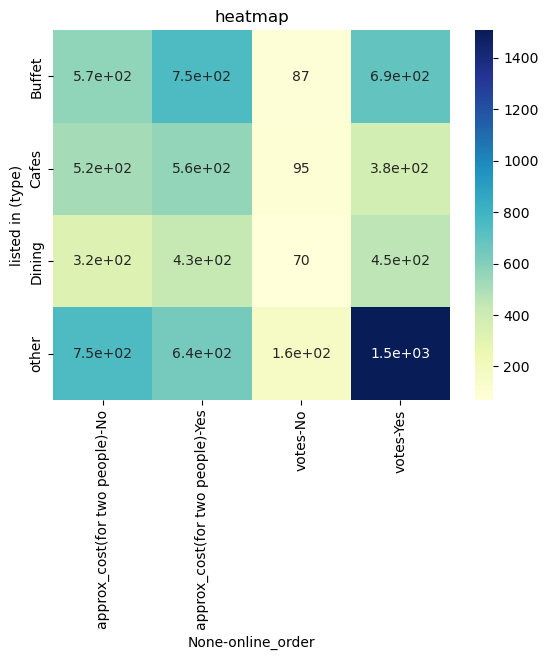

In [154]:
pivot_table=df.pivot_table(index='listed_in(type)',columns="online_order")
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu")
plt.title("heatmap")
plt.ylabel("online_order")
plt.ylabel("listed in (type)")


plt.show()                               

# conclusion:
Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.